Лаборатроная работа №1

Выполнил студент группы 22.М07-мм


Захарова Оксана Михайловна 


1. (Сделано) Самостоятельно реализовать функцию gradient_descent(X, y), которая по заданной обучающей выборке обучает модель линейной регрессии, оптимизируя функционал методом градиентного спуска (Batch Gradient Descent, GD) и возвращая вектор весов w. В качестве функционала можно выбрать, например, функцию ошибок MSE + L2-регуляризатор. Использовать матрично-векторные операции для вычисления градиента.

2. (Сделано) Найти данные, на которых интересно будет решать задачу регрессии. Зависимость целевого признака от нецелевых должна быть не слишком сложной, чтобы обученная линейная модель смогла показать приемлимый результат. В крайнем случае взять данные для предсказания стоимости машин тут (целевой признак для предсказания --- price).

3. (Сделано) Считать данные, выполнить первичный анализ данных, при необходимости произвести чистку данных (Data Cleaning).

4. (Сделано) Выполнить разведочный анализ (EDA), использовать визуализацию, сделать выводы, которые могут быть полезны при дальнейшем решении задачи регрессии.

5. (Не было необходимсти) При необходимости выполнить полезные преобразования данных (например, трансформировать категариальные признаки в количественные), убрать ненужные признаки, создать новые (Feature Engineering).

6. (Сделано) Случайным образом разбить данные на обучающую и тестовую выборки, используя методы существующих библиотек.

7. (Сделано)При обучении моделей использовать масштабирование данных.

8. (Сделано) Обучить модель на обучающей выборке, используя функцию gradient_descent(X, y). Оценить качество модели на обучающей и тестовой выборках, используя MSE, RMSE и R2
9. (Сделано)Обучить модель, используя существующую библиотеку. Например, в sklearn для L2-регуляризатора можно использовать Ridge. Сравнить качество с Вашей реализацией.
10. (Сделано) Повторить тоже самое, но используя кросс-валидацию.
11. (Сделано) Создать таблицу, со строками (mse-train, mse-test, rmse-train, rmse-test, r2-train, r2-test) и столбцами (Fold1, Fold2, ..., Foldk, E, STD), где k --- количество фолдов в кросс-валидации, E --- мат. ожидание и STD --- стандартное отклонение. Сделать выводы.
12. (Сделано) * (+1 балл) Перед обучением моделей подобрать наилучшее количество (и само подмножество) признаков, например используя Recursive Feature Elimination (RFE).
13. (Сделано) *  (+1 балл) Во все ваши реализации добавить возможность настройки нужных гиперпараметров, а в процессе обучения всех моделей осуществить подбор оптимальных значений этих гиперпараметров.
14. (НЕ Сделано) * (+2 балла) Также самостоятельно реализовать метод стохастического градиентного спуска (Stochastic Gradient Descent, SGD), обучить модели и добавить их во все сравнения.
15. (НЕ Сделано) * (+2 балла) Также самостоятельно реализовать метод мини-пакетного градиентного спуска (Mini Batch Gradient Descent), обучить модели и добавить их во все сравнения.

In [74]:
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split


- CRIM - уровень преступности
- ZN - Доля жилой земли
- INDUS - Доля акров, не связанных с розничной торговлей, на город
- CHAS - Наличие реки
- NOX - Концентрация оксида азота 
- RM - Среднее количество комнат в жилом помещении
- AGE - Доля квартир, занятых владельцами, построенных до 1940 года
- DIS - Взвешенные расстояния до пяти бостонских центров занятости
- RAD - Индекс доступности к радиальным магистралям
- TAX - Ставка налога на недвижимость полной стоимости за 10 000 долларов США
- PTRATIO - Соотношение учеников и учителей в разбивке по городам
- B - Доля лиц афроамериканского происхождения
- LSTAT - Процент населения с более низким статусом
- MEDV - Средняя стоимость домов, занятых владельцами, в 1000 долларов - целевая переменная

Первые 5 записей

In [75]:
df = pd.read_csv("boston.csv")
df.head()


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


Статистика по набору данных

In [76]:
df.count()

CRIM       506
ZN         506
INDUS      506
CHAS       506
NOX        506
RM         506
AGE        506
DIS        506
RAD        506
TAX        506
PTRATIO    506
B          506
LSTAT      506
MEDV       506
dtype: int64

In [77]:
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

В датасете нет пропущеных данных


Разведочный анализ

Статистика по целевому признаку

In [78]:
df['MEDV'].value_counts()

50.0    16
25.0     8
22.0     7
21.7     7
23.1     7
        ..
32.9     1
34.6     1
30.3     1
33.3     1
8.1      1
Name: MEDV, Length: 229, dtype: int64

<AxesSubplot: xlabel='MEDV'>

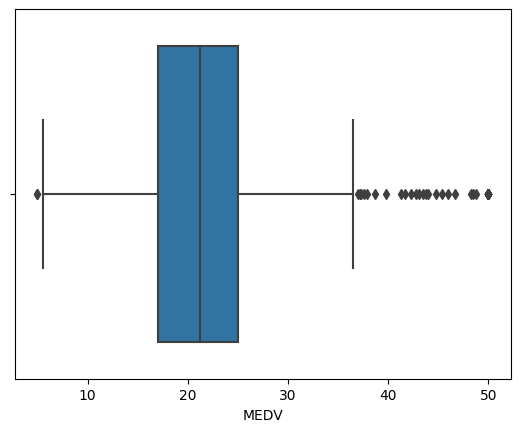

In [79]:
sns.boxplot(x=df['MEDV'])

Выбросы отсутствуют

**Первичный анализ признаков**

Категориальный признак CHAS

In [80]:
df['CHAS'].value_counts()

0.0    471
1.0     35
Name: CHAS, dtype: int64

<AxesSubplot: xlabel='CHAS', ylabel='MEDV'>

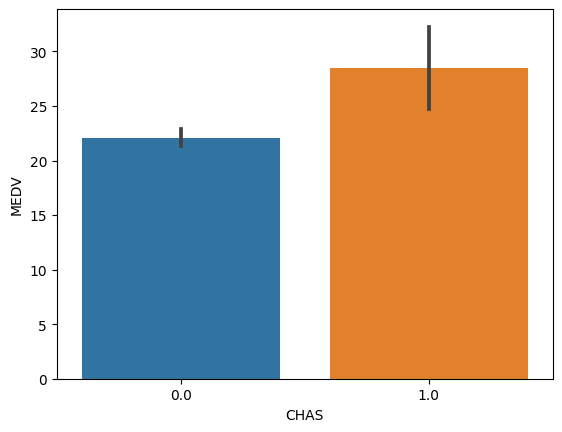

In [81]:
sns.barplot(x='CHAS',y='MEDV',data=df)

In [82]:
df['RAD'].value_counts()

24.0    132
5.0     115
4.0     110
3.0      38
6.0      26
2.0      24
8.0      24
1.0      20
7.0      17
Name: RAD, dtype: int64

<AxesSubplot: xlabel='RAD', ylabel='MEDV'>

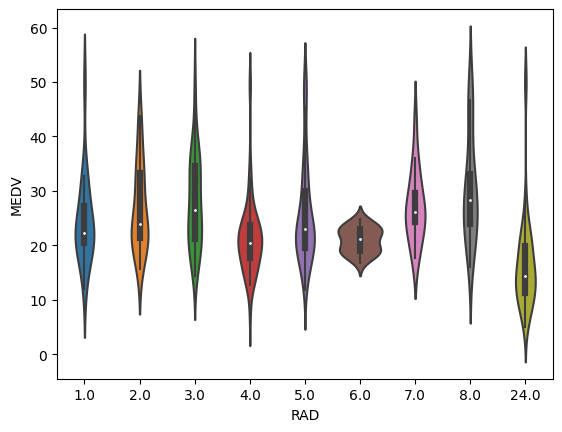

In [83]:
sns.violinplot(x='RAD',y='MEDV',data=df)

Количественный признак RM

In [84]:
df['RM'].describe()

count    506.000000
mean       6.284634
std        0.702617
min        3.561000
25%        5.885500
50%        6.208500
75%        6.623500
max        8.780000
Name: RM, dtype: float64

**Корреляция признаков**

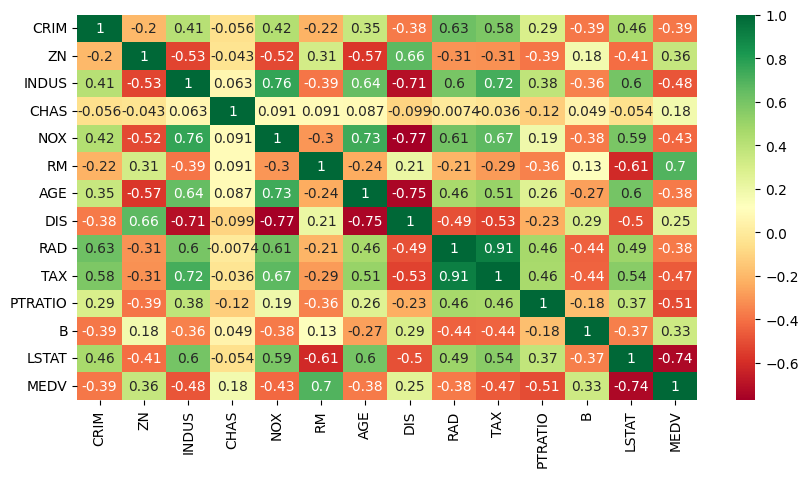

In [85]:
sns.heatmap(df.corr(), annot=True, cmap='RdYlGn')
fig = plt.gcf()
fig.set_size_inches(10, 5)
plt.show()

Выберем **5** перменных, имеющух высокую корреляцию с целевой переменной MEDV - INDUS, RM, TAX, PTRETIO, LSTAT

In [86]:
X = df.drop(columns=["CRIM","ZN","CHAS","NOX","AGE","DIS","RAD","B","MEDV"])
Y = df["MEDV"]

**Разобьем выборку на обучающую и тестовую**

In [87]:

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

Посмотрим какие значения принимает целевой признак

C:\Users\79602\AppData\Local\Temp\ipykernel_672\375460187.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_train)


<AxesSubplot: xlabel='MEDV', ylabel='Density'>

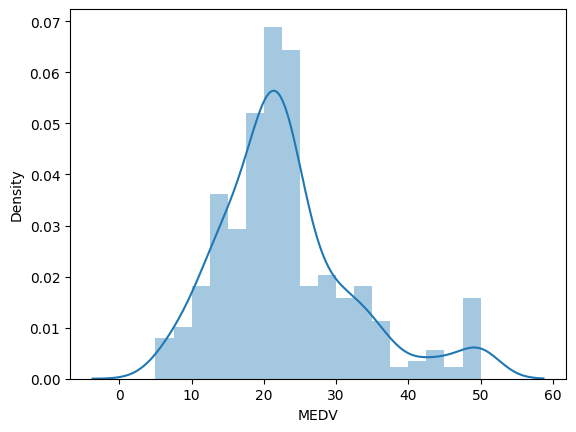

In [88]:
sns.distplot(y_train)

Посмотрим корреляцию между признаками

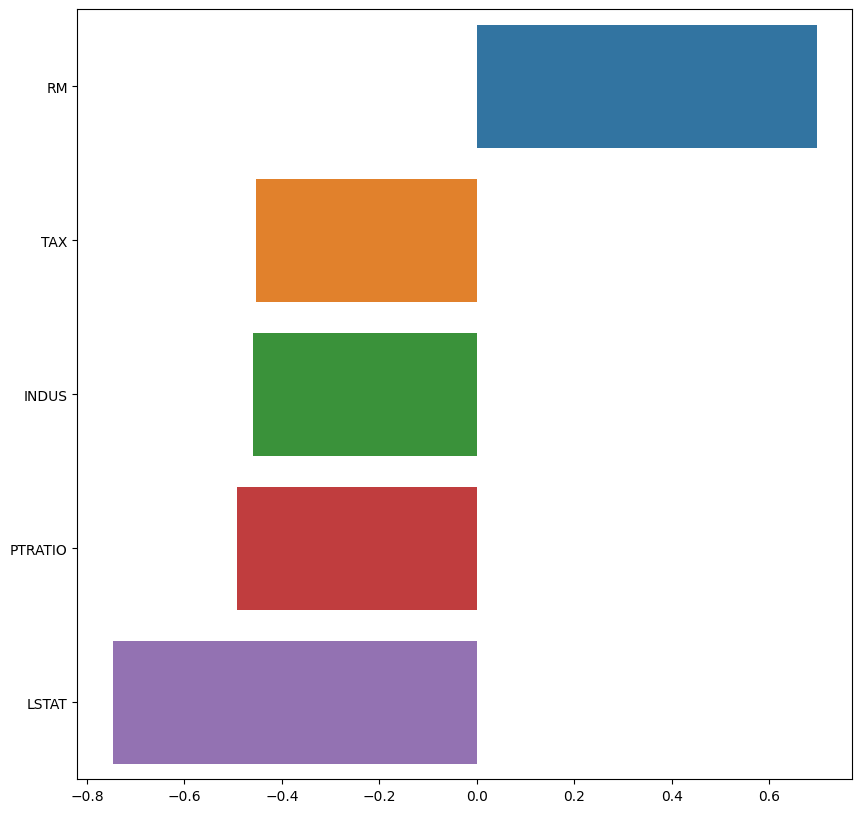

In [89]:
numeric_features = X_train.columns

correlations = X_train[numeric_features].corrwith(y_train).sort_values(ascending=False)

plot = sns.barplot(y=correlations.index, x=correlations)
plot.figure.set_size_inches(10, 10)

Зависимость меду признаками умереная, как изначально и выбиралось

**Масштабирование данных**

In [90]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score

model = Ridge()  # выбранная модель

model.fit(X_train[numeric_features], y_train)  # обучение модели на обучающей выборке

y_train_pred = model.predict(X_train[numeric_features])  # использование модели для предсказания на обучающей
y_test_pred = model.predict(X_test[numeric_features])  # или на тестовой выборке

print("Test RMSE =", mean_squared_error(y_test, y_test_pred, squared=False))
print("Train RMSE =", mean_squared_error(y_train, y_train_pred, squared=False))
print("Train R2 = %.4f" % r2_score(y_train, y_train_pred))
print("Test R2 = %.4f" % r2_score(y_test, y_test_pred))

Test RMSE = 5.107790655193531
Train RMSE = 5.243921286581714
Train R2 = 0.6871
Test R2 = 0.6499


Модель с глупым предсказателем

In [91]:
stupid_pred = y_train.mean()
print("Test RMSE with stupid predictor =", mean_squared_error(y_test, stupid_pred * np.ones(y_test.shape),
                                                                 squared=False))
print("Train RMSE with stupid predictor =", mean_squared_error(y_train, stupid_pred * np.ones(y_train.shape),
                                                                  squared=False))

Test RMSE with stupid predictor = 8.780576101609647
Train RMSE with stupid predictor = 9.375314896772391



Далее, анализируя веса, можно понять какие зависимости нашла модель

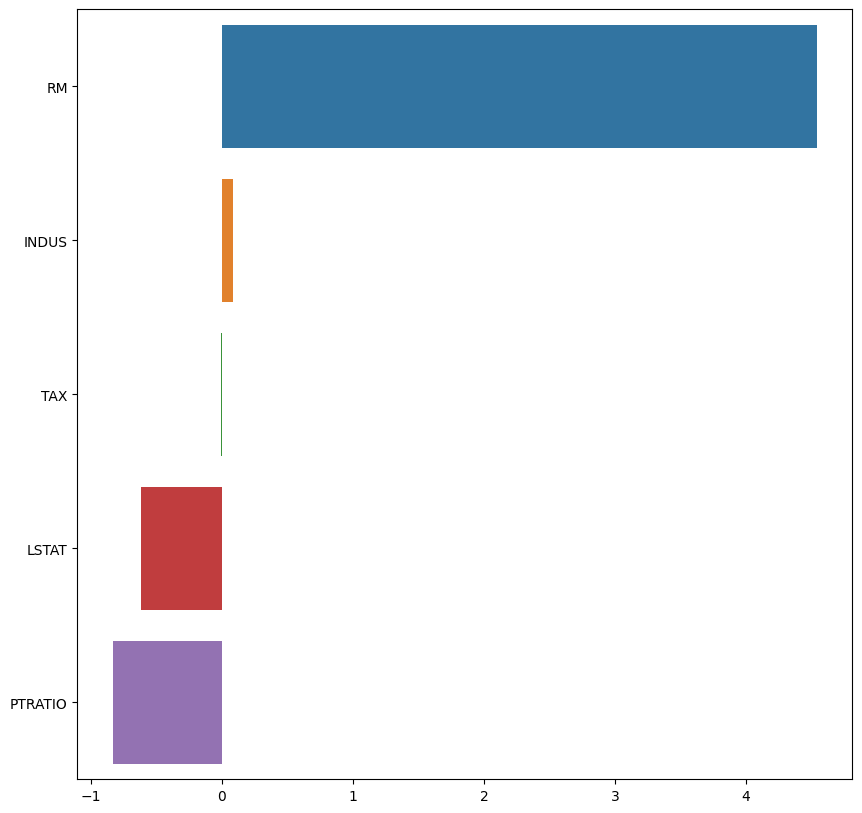

In [92]:
fig, ax = plt.subplots(figsize=(10, 10))

sorted_weights = sorted(zip(model.coef_, numeric_features, X_train[numeric_features].std()), reverse=True)
weights = [x[0] for x in sorted_weights]
features = [x[1] for x in sorted_weights]
sns.barplot(y=features, x=weights, ax=ax)
plt.show()

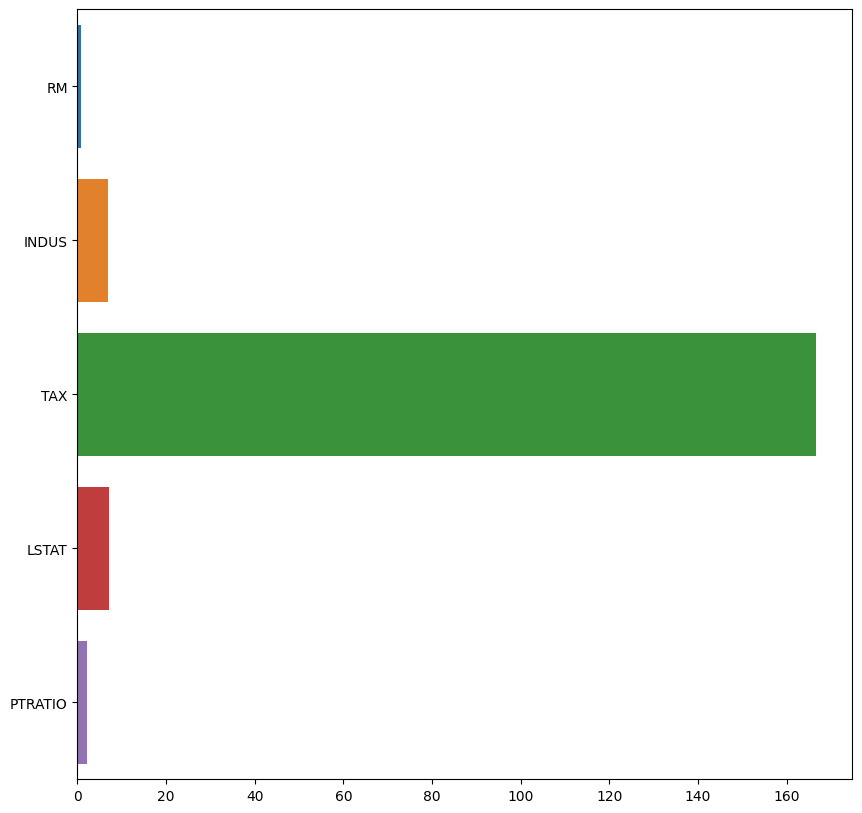

In [93]:
fig, ax = plt.subplots(figsize=(10, 10))
scales = [x[2] for x in sorted_weights]
sns.barplot(y=features, x=scales, ax=ax)
plt.show()

Для масштабирования данных воспользуемся трансформером StandardScaler.

In [94]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()  # воспользуемся стандартным трансформером

# масштабируем обучающую выборку и запоминаем среднее, стандартное отклонение признаков
X_train_scaled = scaler.fit_transform(X_train[numeric_features])

# масштабируем тестовую выборку используя статистики обучающей выборки
X_test_scaled = scaler.transform(X_test[numeric_features])

model = Ridge()
model.fit(X_train_scaled, y_train)
y_test_pred = model.predict(X_test_scaled)
y_train_pred = model.predict(X_train_scaled)

print("Test RMSE = %.4f" % mean_squared_error(y_test, y_test_pred, squared=False))
print("Train RMSE = %.4f" % mean_squared_error(y_train, y_train_pred, squared=False))
print("Train R2 = %.4f" % r2_score(y_train, y_train_pred))
print("Test R2 = %.4f" % r2_score(y_test, y_test_pred))

Test RMSE = 5.1048
Train RMSE = 5.2439
Train R2 = 0.6871
Test R2 = 0.6503


Теперь обучение и оценка важности признаков, а также регуляризация стали честнее

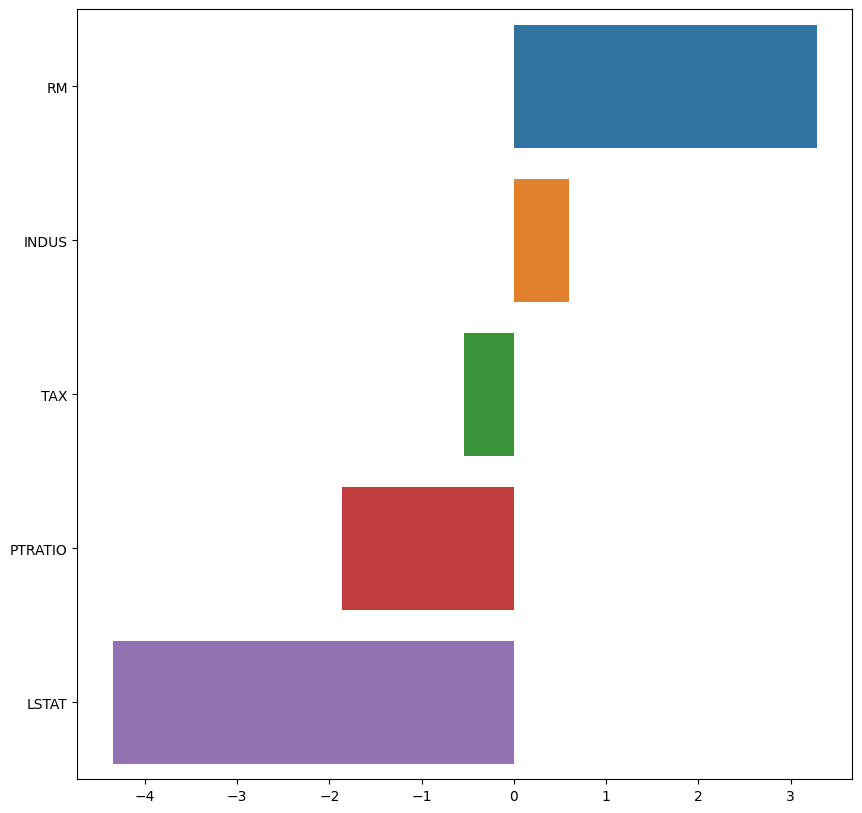

In [95]:
fig, ax = plt.subplots(figsize=(10, 10))

sorted_weights = sorted(zip(model.coef_, numeric_features, X_train_scaled.std(axis=0)), reverse=True)
weights = [x[0] for x in sorted_weights]
features = [x[1] for x in sorted_weights]
sns.barplot(y=features, x=weights, ax=ax)
plt.show()

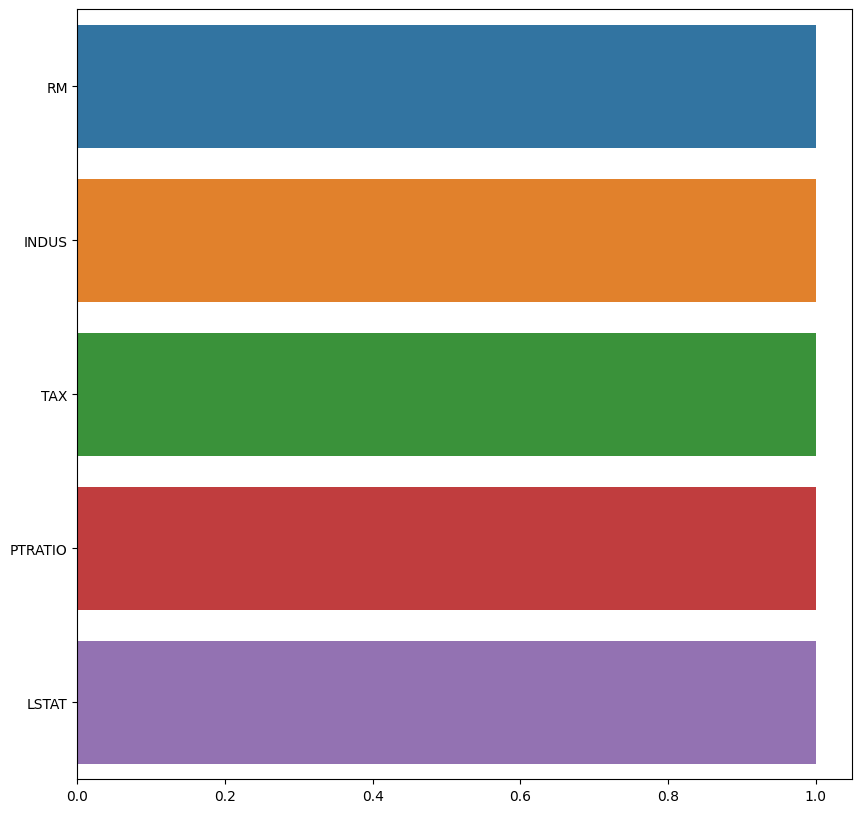

In [96]:
fig, ax = plt.subplots(figsize=(10, 10))
scales = [x[2] for x in sorted_weights]
sns.barplot(y=features, x=scales, ax=ax)
plt.show()

**Обучение модели с использованием собственного градиентного спуска**

In [97]:
def gradient_descent(x, y, alfa, iters, learning_rate, theta):
    shift = 0
    
    for i in range(iters):
        tmp_y = np.dot(x, theta) + shift
        tmp_theta = (1 / x.shape[0]) * (alfa * np.dot(x.T, (tmp_y - y)))
        tmp_shift = (1 / x.shape[0]) * (alfa * np.sum(tmp_y - y))

        theta = theta - learning_rate * tmp_theta
        shift = shift - learning_rate * tmp_shift

    return theta, shift

Задаем параметры

In [98]:
iters = 5000
alfa = 0.2
learning_rate = 0.1
theta = np.zeros(X_train_scaled.shape[1])

In [99]:
theta_final, gd_shift = gradient_descent(X_train_scaled, y_train, alfa, iters, learning_rate, theta)
y_test_pred = np.dot(X_test_scaled, theta_final) + gd_shift
y_train_pred = np.dot(X_train_scaled, theta_final) + gd_shift


gd_test_rmse = mean_squared_error(y_test, y_test_pred, squared=False)
gd_train_rmse = mean_squared_error(y_train, y_train_pred, squared=False)

gd_test_mse = mean_squared_error(y_test, y_test_pred, squared=True)
gd_train_mse = mean_squared_error(y_train, y_train_pred, squared=True)

gd_test_r2 = r2_score(y_test, y_test_pred)
gd_train_r2 = r2_score(y_train, y_train_pred)
print(gd_test_r2)


0.6499135956539926


**Обучение модели, используя библиотеку Ridge**

Поиск оптимального гиперпараметра для библиотеки Ridge

In [100]:
from sklearn.linear_model import RidgeCV

regr_cv = RidgeCV(alphas=[0.1, 1.0, 10.0, 11.0, 15.0, 16.0, 16.3, 16.4, 16.46, 16.47, 17.0])
model_cv = regr_cv.fit(X_train_scaled, y_train)
model_cv.alpha_

16.46

In [101]:
alpha = 16.46

ridge_regression = Ridge(alpha=alpha)
ridge_regression.fit(X_train_scaled, y_train)
y_test_pred = ridge_regression.predict(X_test_scaled)
y_train_pred = model.predict(X_train_scaled)


ridge_test_rmse = mean_squared_error(y_test, y_test_pred, squared=False)
ridge_train_rmse = mean_squared_error(y_train, y_train_pred, squared=False)

ridge_test_mse = mean_squared_error(y_test, y_test_pred, squared=True)
ridge_train_mse = mean_squared_error(y_train, y_train_pred, squared=True)

ridge_test_r2 = r2_score(y_test, y_test_pred)
ridge_train_r2 = r2_score(y_train, y_train_pred)

# вывод точности предсказания
print(ridge_regression.score(X_test_scaled, y_test))

0.6547560183249678


Сравнение результатов обучения моделей

In [102]:
table = {
    'mertrics\data': ['MSE', 'RMSE', 'R2'],
    'gd train':[gd_train_mse, gd_train_rmse, gd_train_r2],
    'gd test': [gd_test_mse, gd_test_rmse, gd_test_r2],
    'Ridge train': [ridge_train_mse, ridge_train_rmse, ridge_train_r2],
    'Ridge test': [ridge_test_mse, ridge_test_rmse, ridge_test_r2],
}

pd.DataFrame(data=table)

,mertrics\data,gd train,gd test,Ridge train,Ridge test
0,MSE,27.498181,26.086022,27.498465,25.725198
1,RMSE,5.243871,5.107448,5.243898,5.072001
2,R2,0.687153,0.649914,0.687150,0.654756


**Выводы**

Можно сделать вывод, что собственная модель не уступает сущетсвующей модели Ridge

Кросс-валидация

In [103]:
from sklearn.model_selection import KFold, cross_validate
from statistics import mean


scoring = {'neg_mse': 'neg_mean_squared_error',
           'neg_rmse': 'neg_root_mean_squared_error',
           'r2': 'r2'}

k_folds = KFold(n_splits = 5, random_state=42, shuffle=True)
scores = cross_validate(Ridge(alpha=16.46), X, Y, cv = k_folds,
                                scoring={'neg_mse': 'neg_mean_squared_error',
                                         'neg_rmse': 'neg_root_mean_squared_error',
                                         'r2': 'r2'},
                                return_train_score = True)

scores_df = pd.DataFrame([], ['MSE', 'RMSE', 'R2'], columns=[])
scores_df = pd.DataFrame(scores)

scores_df.drop(['fit_time', 'score_time'], axis = 1, inplace = True)
scores_df['test_neg_mse'] = -scores_df['test_neg_mse']
scores_df['train_neg_mse'] = -scores_df['train_neg_mse']
scores_df['test_neg_rmse'] = -scores_df['test_neg_rmse']
scores_df['train_neg_rmse'] = -scores_df['train_neg_rmse']
scores_df.rename(columns = {"test_neg_mse" : "mse-test",
                                  "train_neg_mse" : "mse-train",
                                  "test_neg_rmse" : "rmse-test",
                                  "train_neg_rmse" : "rmse-train",
                                  "test_r2" : "r2-test",
                                  "train_r2" : "r2-test"},
                       inplace = True)
scores_df = scores_df.transpose()
scores_df.set_axis(['1','2','3','4','5'], axis=1, inplace = True)
scores_df['E'] = scores_df.mean(numeric_only=True,axis=1)
scores_df['STD'] = scores_df.std(numeric_only=True,axis=1)

scores_df

C:\Users\79602\AppData\Local\Temp\ipykernel_672\2452052222.py:32: FutureWarning: DataFrame.set_axis 'inplace' keyword is deprecated and will be removed in a future version. Use `obj = obj.set_axis(..., copy=False)` instead
  scores_df.set_axis(['1','2','3','4','5'], axis=1, inplace = True)


,1,2,3,4,5,E,STD
mse-test,27.147516,26.778505,31.094587,28.774546,25.857280,27.930487,1.841861
mse-train,27.017805,27.480815,26.084589,26.822115,27.446465,26.970357,0.509128
rmse-test,5.210328,5.174795,5.576252,5.364191,5.085005,5.282114,0.172497
rmse-train,5.197865,5.242215,5.107307,5.179007,5.238937,5.193066,0.049183
r2-test,0.629809,0.658985,0.658221,0.724506,0.640404,0.662385,0.032962
r2-test,0.688998,0.679443,0.684065,0.661397,0.686456,0.680072,0.009854


**Выводы**

Значение 0.724506 больше, полученного ране, без использования данного метода